# Measures of Position

## Z-Scores

For problems in which we are given an observed value, the mean, and the standard deviation up front, it is easiest to write a function that will calculate the z-score for us.

In [1]:
# obs_val is the data value we are given (x)
def get_zscore(obs_val, mean, std_dev):
    return (obs_val - mean) / std_dev

For example 1, to calculate the student's z-score on the SAT, we listed the following:

* x = 1350
* $\mu$ = 1059
* $\sigma$ = 210



In [2]:
x = 1350
mu = 1059
sigma = 210

get_zscore(x, mu, sigma)

1.3857142857142857

## Percentiles

There are usually 2 types of problems when dealing with percentiles in statistics:

* You need to find the percentile for a given value
* You need to find a value that corresponds to a given percentile

We looked at the first type of problem. To perform this calculation using Python, we need a new library to import. That library, which we will use quite a bit, is called SciPy. In particular, we want the statistical functions: `scipy.stats`.

Like NumPy, we first need to import SciPy.

In [3]:
import scipy.stats as stats

The function we are interested in is `percentileofscore` which can take up to three input values:

1. The list we are given.
2. The individual value we are trying to find the percentile score for.
3. The way the percentile score is calculated (for instance, using only list values less than the given value compared to less that or equal to the given value).

For the last input listed, we will use the following:

* If we **do not include** the value, use `kind = 'strict'`
* If we **do include** the value, use `kind = 'weak'`

### Example 3: Only values less than 85

In [4]:
data = [74, 74, 76, 77, 83, 85, 85, 90, 93, 94, 97, 98]

In [5]:
stats.percentileofscore(data, 85, kind='strict')

41.66666666666667

### Example 4: Values less than or equal to 85

In [6]:
stats.percentileofscore(data, 85, kind='weak')

58.333333333333336

### Finding a Score Corresponding to a Given Percentile

If you want to know what score corresponds to a given percentile, you can use NumPy's `percentile` method. 

*Note*: There are many methods NumPy can use to make this calculation.

If we wanted to know what value in our `data` list corresponds to the 90th percentile, we would do the following:

In [7]:
import numpy as np

In [8]:
np.percentile(data, 90)

96.7

## Five-Number Summary

There are a couple of options for finding the five-number summary using Python. One is much less work than the other. 

1. Use NumPy's `min`, `max`, `med`, and `percentile` methods.
2. Convert the data to a data frame and use Pandas' `describe` method.

First, let's look at using Numpy. We'll create our own function to expedite the process.

In [9]:
example5 = [1, 2, 2, 4, 5, 7, 11, 15, 15, 18, 44]

In [10]:
def five_number_summary(dataset):
    return (
        np.min(dataset),
        np.percentile(dataset, 25),
        np.median(dataset),  # we could have also used np.percentile(dataset, 50)
        np.percentile(dataset, 75),
        np.max(dataset)
    )

In [11]:
five_number_summary(example5)

(1, 3.0, 7.0, 15.0, 44)

Using Pandas, we will first convert our list to a data frame using `pd.DataFrame`

We could also convert it to a series using `pd.Series`

Regardless, don't forget to import pandas first.

In [12]:
import pandas as pd

In [13]:
example5_df = pd.DataFrame(example5)

In [14]:
example5_df.describe()

,0
count,11.000000
mean,11.272727
std,12.378133
min,1.000000
25%,3.000000
50%,7.000000
75%,15.000000
max,44.000000


### Outliers and Fences

Recall that to determine fence values and outliers, we need the innerquartile range first. We have some options for determining this:

* Write a function using NumPy's `percentile` function and subract the results.
* Use the `iqr` method from `scipy.stats`

First, using NumPy:

In [15]:
def get_IQR(dataset):
    return np.percentile(dataset, 75) - np.percentile(dataset, 25)

In [16]:
get_IQR(example5)

12.0

Next, using SciPy:

In [17]:
stats.iqr(example5)

12.0

Now, we can determine the lower and upper fence values. Below is a way to do so in NumPy. Doing so in SciPy is left to you.

In [18]:
def get_fences(dataset):
    return (
        np.percentile(dataset,25) - 1.5 * get_IQR(dataset),
        np.percentile(dataset,75) + 1.5 * get_IQR(dataset)
    )

In [19]:
get_fences(example5)

(-15.0, 33.0)

We can even go a step further and use the `get_fences` function to detect outliers.

In [20]:
def detect_outliers(dataset):
    outliers = []  # blank list to fill with outliers
    for value in dataset:
        # determine if each value is less than the lower fence or more than the upper fence
        if (value < get_fences(dataset)[0] or value > get_fences(dataset)[1]):
            outliers.append(value)
    return outliers

In [21]:
detect_outliers(example5)

[44]

## Box Plots

Since box plots are a visual display of data, we will need to import one (or more) of our libraries: Matplotlib, Seaborn, or Plotly Express.

### Matplotlib

In [22]:
import matplotlib.pyplot as plt

To construct a box plot for the data in example 5, we need the `boxplot` method.

By default, matplotlib will plot box plots vertically. If you want them plotted horizontally, add `vert = False` inside the parentheses.

Also, by default, matplotlib draws modified box plots and will indicate outliers with circles. You can change what symbol matplotlib uses for outliers by adding `sym=` as a parameter.

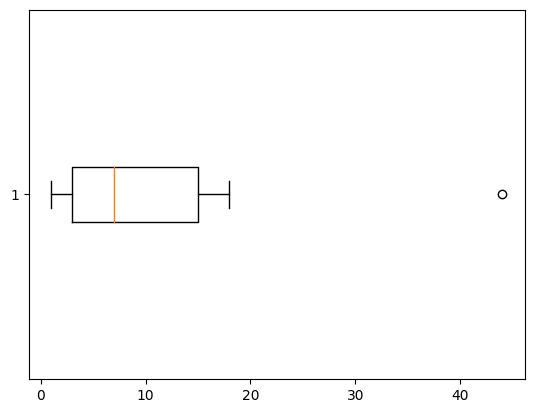

In [23]:
fig, ax = plt.subplots()
ax.boxplot(
    example5,
    vert = False
)

plt.show()

If you don't want a modified box plot, add `whis = (0,100)` to the parameters.

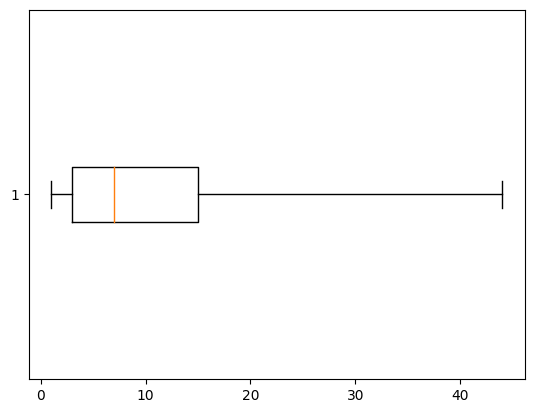

In [24]:
fig, ax = plt.subplots()
ax.boxplot(
    example5,
    vert = False,
    whis = (0,100)
)

plt.show()

### Seaborn

In [25]:
import seaborn as sns

In [26]:
sns.set_theme(style="darkgrid")  # for aesthetics

Like matplotlib, we will use the `boxplot` method.

* By default, box plots are vertical. To change this, add `orient='h'` to the parameters.
* Also by default, modified box plots are given. To change this, like in matplotlib, add `whis=(0,100)` 

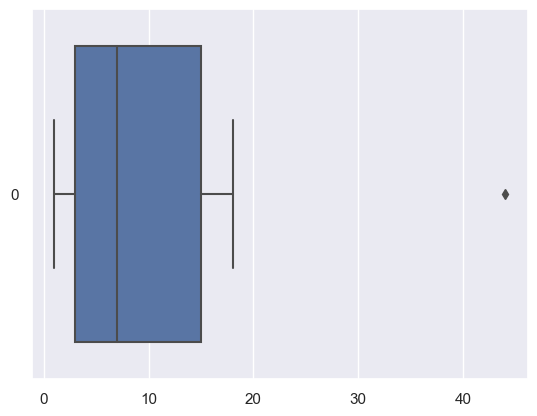

In [27]:
sns.boxplot(
    data = example5,
    orient = 'h'
)
plt.show()

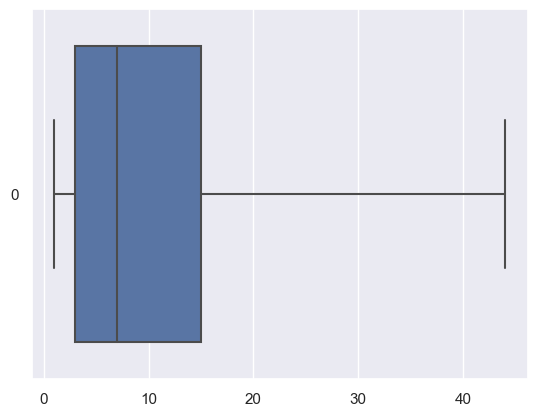

In [28]:
sns.boxplot(
    data = example5,
    orient = 'h',
    whis = (0,100)
)
plt.show()

### Plotly Express

In [29]:
import plotly.express as px

Plotly Express uses the `box` method to create box plots.

In [30]:
bp = px.box(example5)
bp.update_traces(quartilemethod="inclusive")  # use this to get the five-number summary we got in the notes
bp.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

For horizontal box plots and/or ones that are not modified, we have to work around this a bit.

We will have to use the `graph_objects` library in Plotly.

In [ ]:
import plotly.graph_objects as go

In [ ]:
# create a blank figure and then display our plot
figure = go.Figure(
    go.Box(x = example5,  # using `x =` gives us a horizontal box plot
          quartilemethod="inclusive"
          ) 
)
figure.show()

In [ ]:
# Create a box plot that is not a modified one
figure = go.Figure(
    go.Box(x = example5,
           quartilemethod="inclusive",
           boxpoints = False  # this overrides the creation of a modified box plot
          )
)
figure.show()